# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/3894b80f8e87b2f3edcca7c9b65f23c5cb708e1a0f4a2f6d4c35aec8.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Berlin, Land Berlin, Germany**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'3894b80f8e87b2f3edcca7c9b65f23c5cb708e1a0f4a2f6d4c35aec8')

### Manipulating the Data

In [2]:
# Reading the data
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/3894b80f8e87b2f3edcca7c9b65f23c5cb708e1a0f4a2f6d4c35aec8.csv')
df.head(10)

,ID,Date,Element,Data_Value
0,GM000003319,2007-10-18,TMAX,116
1,GME00111445,2006-01-24,TMAX,-74
2,GME00121150,2006-03-31,TMIN,68
3,GM000003319,2005-05-22,TMAX,215
4,GME00111445,2008-08-07,TMIN,163
5,GM000003319,2010-03-16,TMAX,41
6,GM000003319,2007-04-03,TMAX,101
7,GME00102236,2014-07-14,TMIN,149
8,GM000003319,2009-12-11,TMAX,51
9,GM000003319,2007-10-07,TMIN,39


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36706 entries, 0 to 36705
Data columns (total 4 columns):
ID            36706 non-null object
Date          36706 non-null object
Element       36706 non-null object
Data_Value    36706 non-null int64
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [4]:
# Convert the Date from an Object(string) type to a datetime
df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36706 entries, 0 to 36705
Data columns (total 4 columns):
ID            36706 non-null object
Date          36706 non-null datetime64[ns]
Element       36706 non-null object
Data_Value    36706 non-null int64
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.1+ MB


In [5]:
# remove the leap days(i.e. February 29th)
index_remove = df[(df.Date.dt.month == 2) & (df.Date.dt.day==29)].index.values
df.drop(index_remove,axis=0,inplace=True)

In [6]:
r = df.sort_values(by=['Date'])
r.head()

,ID,Date,Element,Data_Value
2412,GM000003319,2005-01-01,TMIN,44
2433,GM000003319,2005-01-01,TMAX,74
34480,GM000003342,2005-01-01,TMIN,38
15652,GME00102236,2005-01-01,TMIN,34
5838,GME00121150,2005-01-01,TMAX,76


In [7]:
t = r.copy()
t['Month_Day']=t['Date'].dt.strftime('%m/%d')
t['Year'] = t['Date'].dt.year
t.head()

,ID,Date,Element,Data_Value,Month_Day,Year
2412,GM000003319,2005-01-01,TMIN,44,01/01,2005
2433,GM000003319,2005-01-01,TMAX,74,01/01,2005
34480,GM000003342,2005-01-01,TMIN,38,01/01,2005
15652,GME00102236,2005-01-01,TMIN,34,01/01,2005
5838,GME00121150,2005-01-01,TMAX,76,01/01,2005


In [8]:
'''
#make a copy
t = df.copy()
t['Month'] = t.Date.dt.month
t['Day'] = t.Date.dt.day


t['Month_Day'] = t[t.columns[4:]].apply(lambda x: '-'.join(x.dropna().astype(int).astype(str)),axis=1)
t.head()
'''

"\n#make a copy\nt = df.copy()\nt['Month'] = t.Date.dt.month\nt['Day'] = t.Date.dt.day\n\n\nt['Month_Day'] = t[t.columns[4:]].apply(lambda x: '-'.join(x.dropna().astype(int).astype(str)),axis=1)\nt.head()\n"

In [9]:
#make a copy
#t = df.copy()
# make a subset data from 2005 till 2014
t_2015 = t[(t.Date.dt.year == 2015)]
t_2015_index = t_2015.index.values
t.drop(t_2015_index,axis=0,inplace=True)

In [10]:
# take the min temperature of each day and save the data in a list
mint_day = pd.DataFrame([t.groupby(t.Month_Day).Data_Value.min()]).T.reset_index()
# take the max temperature of each day and save the data in a list
maxt_day = pd.DataFrame([t.groupby(t.Month_Day).Data_Value.max()]).T.reset_index()

In [11]:
#Same for 2015
mint_day_2015 = pd.DataFrame([t_2015.groupby(t_2015.Month_Day).Data_Value.min()]).T.reset_index()
maxt_day_2015 = pd.DataFrame([t_2015.groupby(t_2015.Month_Day).Data_Value.max()]).T.reset_index()


In [12]:
import numpy as np
#Compute broken 2015 by comparing two arrays
# provide index values 
broken_low = np.where(mint_day_2015.Data_Value < mint_day.Data_Value)
broken_high = np.where(maxt_day_2015.Data_Value > maxt_day.Data_Value)

### Visualization

In [13]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure
import matplotlib.dates as dates

<IPython.core.display.Javascript object>


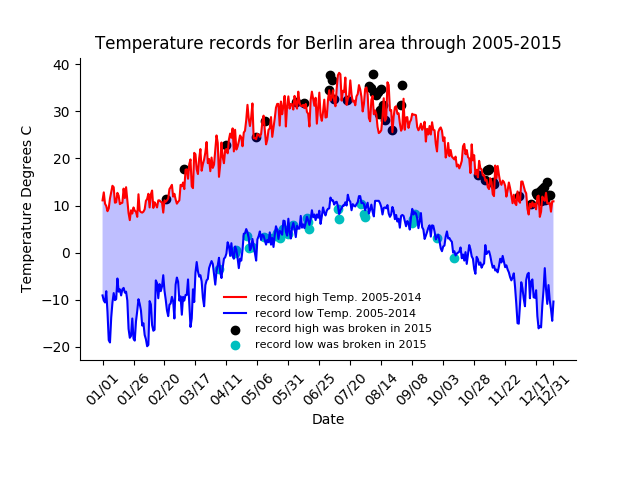

In [14]:
plt.figure()


#fix the t ticks name
l = list(range(0,365,25))+[364]
x_ticks = mint_day_2015.iloc[l].Month_Day
x = plt.gca().xaxis
[item.set_rotation(45) for item in x.get_ticklabels()]
plt.xticks(l,x_ticks)

#plot the records for the period 2005-2014 with the broken record in 2015
## line plot for the records
plt.plot(maxt_day.index,maxt_day.Data_Value/10.0, color='r', label ='record high Temp. 2005-2014')
plt.plot(mint_day.index,mint_day.Data_Value/10.0, color='b', label ='record low Temp. 2005-2014')
##scatter plot for the points
plt.scatter(broken_high[0][:],maxt_day_2015.Data_Value.iloc[broken_high[0][:]]/10.0, color=(0,0,0), marker='o', label='record high was broken in 2015')
plt.scatter(broken_low[0][:],mint_day_2015.Data_Value.iloc[broken_low[0][:]]/10.0, color='c', marker='o', label='record low was broken in 2015')

# fill the area between the high and low Temp. records
plt.gca().fill_between(range(len(mint_day.index)), 
                       np.array(mint_day.Data_Value/10.0), np.array(maxt_day.Data_Value/10.0), 
                       facecolor='blue', 
                       alpha=0.25)


#set the frame, title, legend, and axes
#plt.legend(loc='best', frameon = False)
#plt.legend(loc = 4, frameon = False)
#plt.legend(bbox_to_anchor=(1.05, 1),loc=2, frameon = False)
plt.legend(loc='best', frameon = False,prop={'size': 8})
plt.title('Temperature records for Berlin area through 2005-2015')
plt.xlabel('Date')
plt.ylabel('Temperature Degrees C')
# Set date axis format
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#adjust the plot
plt.subplots_adjust(bottom=0.25)

In [15]:
plt.savefig('assignment2_Mawas.png', format='png')